### EDA using Univariate Analysis
#### Source
    https://www.youtube.com/watch?v=4HyTlbHUKSw&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=21
    https://github.com/campusx-official/100-days-of-machine-learning/tree/main/day20-univariate-analysis

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
%pip install seaborn
%pip install pandas-profiling
# %pip install pydantic-settings
%pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 755.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 2.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Attempti

In [37]:
results = pd.read_csv('./data/stack-overflow-survey-2023/survey_results_public.csv', index_col='ResponseId')
schema = pd.read_csv('./data/stack-overflow-survey-2023/survey_results_schema.csv')

# results Number columns 
# ['YearsCode', 'YearsCodePro', 'CompTotal', 'ConvertedCompYearly']

In [ ]:
## Source: https://stackoverflow.com/a/76678838/8592918

from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport


# Generate the data profiling report 
report = ProfileReport(results, title='survey_results_public_profiling', minimal=True)
report.to_file("./data/stack-overflow-survey-2023/survey_results_public_profiling.html")

In [4]:
print(results.shape)
print(schema.shape)
print(results.columns)

(89184, 83)
(78, 6)
Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISea

In [53]:
results.sample(30)

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
23909,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Pluralsight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
80117,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,53545.0
28524,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Books;How-to videos;Stack Overflow,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,100297.0
16572,I agree,I am a developer by profession,55-64 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,How-to videos;Stack Overflow,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
39881,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,NaN,...,3-5 times a week,6-10 times a week,1-2 times a week,Over 120 minutes a day,60-120 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,58259.0
36259,I agree,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;Udemy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
9166,I agree,I am a developer by profession,18-24 years old,"Student, full-time",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,Udemy;Coursera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
38820,I agree,I code primarily as a hobby,18-24 years old,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Codecademy;Udemy;Pluralsight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
37072,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,53544.0


In [6]:
schema.head(78)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


### Categorical Data, EDA

In [7]:
results.nunique()

Q120                      1
MainBranch                6
Age                       8
Employment              106
RemoteWork                3
                       ... 
ProfessionalTech        284
Industry                 12
SurveyLength              3
SurveyEase                3
ConvertedCompYearly    8784
Length: 83, dtype: int64

### Clearning and modify data

In [79]:
# Yes=1 and No=0
results.replace({'Yes': 1, 'No': 0}, inplace=True)

# Rename vals 
results['Industry'] = results['Industry'].str.replace(
    'Information Services, IT, Software Development, or other Technology', 'IT')
# results['Industry']

# cast to Int, None=-1, 
results['YearsCode'] = results['YearsCode'].replace({None: -1, 'Less than 1 year': 1, 'More than 50 years': 50})
results['YearsCode'] = results['YearsCode'].astype(int)
# results['YearsCode'].unique()

results['SOAccount'] = results['SOAccount'].replace({'Not sure/can\'t remember': -1})
# results['SOAccount'].unique()

In [9]:
industry = results['Industry']
industry.value_counts()

Industry
IT                                                18159
Financial Services                                 4421
Other                                              4011
Manufacturing, Transportation, or Supply Chain     2607
Healthcare                                         2216
Retail and Consumer Services                       1955
Higher Education                                   1242
Advertising Services                                786
Insurance                                           707
Oil & Gas                                           276
Legal Services                                      210
Wholesale                                           184
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Industry'>

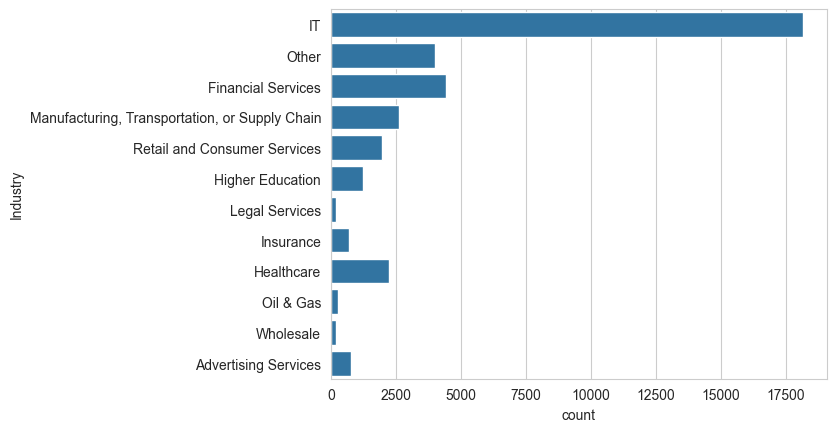

In [10]:
sns.countplot(industry)

<Axes: ylabel='count'>

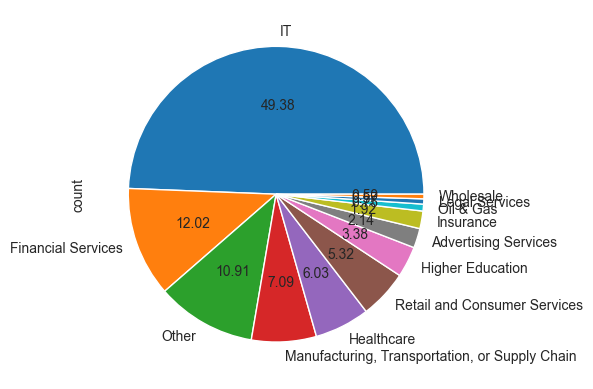

In [11]:
industry.value_counts().plot(kind='pie', autopct='%.2f')

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          41.724165
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       23.351483
Some college/university study without earning a degree                                13.359781
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.113330
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         4.418401
Associate degree (A.A., A.S., etc.)                                                    3.190752
Primary/elementary school                                                              2.165437
Something else                                                                         1.676651
Name: proportion, dtype: float64


<Axes: xlabel='count', ylabel='EdLevel'>

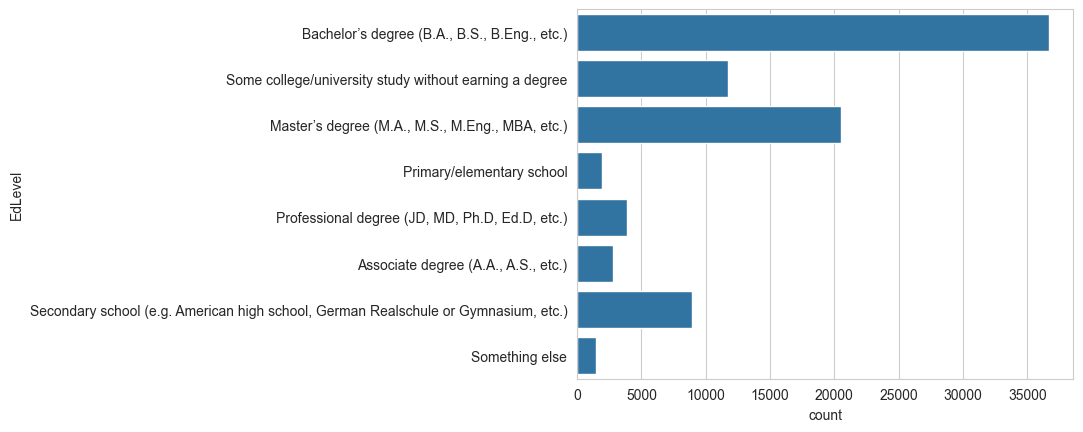

In [12]:
edLevel = results['EdLevel'].value_counts(normalize=True) * 100
print(edLevel)
sns.countplot(results['EdLevel'])

<Axes: ylabel='proportion'>

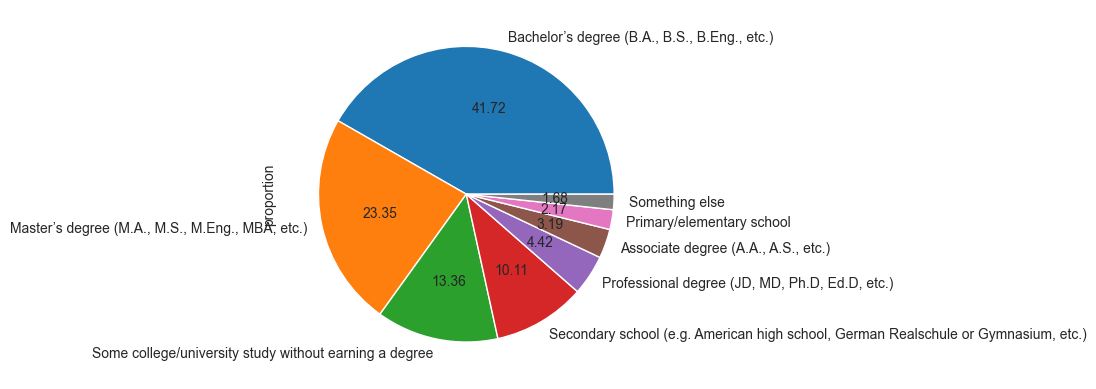

In [13]:
edLevel.plot(kind='pie', autopct='%.2f')

### Numerical data

[-1 18 27 12  6 21  4  5 20 14 10 15 11  3 24  8 13  1 16 33 22 30 32  7
 35 28 40 17 29 19 50  9 38 26 34 25  2 45 23 31 43 48 41 39 42 37 36 44
 46 49 47]


(array([1749., 2262., 2826., 4269., 4466., 5415., 4893., 4800., 4879.,
        3130., 6521., 2519., 3471., 2601., 2278., 4336., 1842., 1544.,
        1690.,  826., 4021.,  761., 1210., 1327.,  959., 2685.,  706.,
         710.,  715.,  324., 2078.,  272.,  444.,  496.,  333., 1118.,
         282.,  312.,  428.,  229., 1302.,  227.,  347.,  265.,  160.,
         360.,  101.,   79.,   96.,  520.]),
 array([-1.000e+00,  2.000e-02,  1.040e+00,  2.060e+00,  3.080e+00,
         4.100e+00,  5.120e+00,  6.140e+00,  7.160e+00,  8.180e+00,
         9.200e+00,  1.022e+01,  1.124e+01,  1.226e+01,  1.328e+01,
         1.430e+01,  1.532e+01,  1.634e+01,  1.736e+01,  1.838e+01,
         1.940e+01,  2.042e+01,  2.144e+01,  2.246e+01,  2.348e+01,
         2.450e+01,  2.552e+01,  2.654e+01,  2.756e+01,  2.858e+01,
         2.960e+01,  3.062e+01,  3.164e+01,  3.266e+01,  3.368e+01,
         3.470e+01,  3.572e+01,  3.674e+01,  3.776e+01,  3.878e+01,
         3.980e+01,  4.082e+01,  4.184e+01,  4.286e+01, 

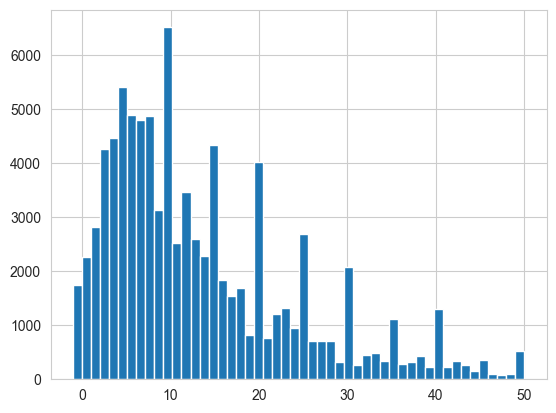

In [14]:
yearsOfCode = results['YearsCode']
print(yearsOfCode.unique())

plt.hist(yearsOfCode, bins=50)

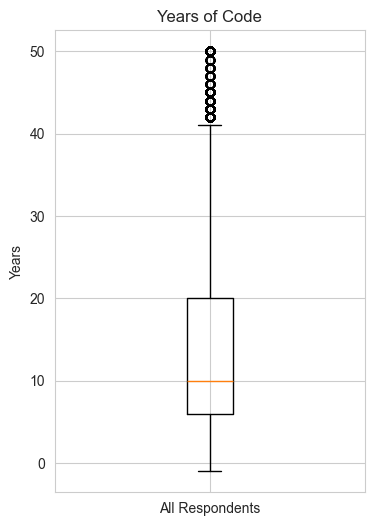

count    89184.000000
mean        13.680234
std         10.625917
min         -1.000000
25%          6.000000
50%         10.000000
75%         20.000000
max         50.000000
Name: YearsCode, dtype: float64

In [103]:
yearsOfCode =  results['YearsCode'].dropna()

# Creating a box plot
plt.figure(figsize=(4, 6))
plt.boxplot(yearsOfCode)
plt.xticks([1], ['All Respondents'])  # Setting x-axis label
plt.ylabel('Years')
plt.title('Years of Code')
plt.grid(True)
plt.show()

yearsOfCode.describe()

